<a href="https://colab.research.google.com/github/herysedra/ady_cov/blob/master/sr/modely_RP/R_ihorombe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pynverse

  Created wheel for pynverse: filename=pynverse-0.1.4.4-cp36-none-any.whl size=6350 sha256=d8182136c456dc2e6153f5ccec052a83ba9c356069f1bec3e3dc19a1de86685b
  Stored in directory: /root/.cache/pip/wheels/80/ab/86/ec93f37613f012ba3e65c2bbd67e5c54cbc00d237574100c24
Successfully built pynverse


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib
import pickle

import datetime
import time
from datetime import date

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

from numpy import log,exp
from numpy.random import multinomial
from scipy.stats import uniform, gamma, gengamma, poisson, nbinom, expon
from scipy.integrate import quad


from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


from pynverse import inversefunc

tilyvoa = pd.read_csv("/content/drive/My Drive/data/tilyvoafaritra.csv")

mdg_databe = pd.read_csv("/content/drive/My Drive/data/databe mdg.csv")

#tilyvoa.set_index('Daty', inplace=True)

tilyvoafar = tilyvoa.groupby('Faritra')

tilyvoamdg = tilyvoafar.get_group('Madagasikara')
tilyvoamdg.set_index('Daty', inplace=True)
tilyvoamdg.index = pd.to_datetime(tilyvoamdg.index)

tilyvoaanala = tilyvoafar.get_group('Analamanga')
tilyvoaanala.set_index('Daty', inplace=True)
tilyvoaanala.index = pd.to_datetime(tilyvoaanala.index)

tilyvoaatsi = tilyvoafar.get_group('Atsinanana')
tilyvoaatsi.set_index('Daty', inplace=True)
tilyvoaatsi.index = pd.to_datetime(tilyvoaatsi.index)

tilyvoaalao = tilyvoafar.get_group('Alaotra')
tilyvoaalao.set_index('Daty', inplace=True)
tilyvoaalao.index = pd.to_datetime(tilyvoaalao.index)

tilyvoamania = tilyvoafar.get_group('Mania')
tilyvoamania.set_index('Daty', inplace=True)
tilyvoamania.index = pd.to_datetime(tilyvoamania.index)

tilyvoajiro = tilyvoafar.get_group('Analanjirofo')
tilyvoajiro.set_index('Daty', inplace=True)
tilyvoajiro.index = pd.to_datetime(tilyvoajiro.index)

tilyvoanosy = tilyvoafar.get_group('Anosy')
tilyvoanosy.set_index('Daty', inplace=True)
tilyvoanosy.index = pd.to_datetime(tilyvoanosy.index)

tilyvoaandro = tilyvoafar.get_group('Androy')
tilyvoaandro.set_index('Daty', inplace=True)
tilyvoaandro.index = pd.to_datetime(tilyvoaandro.index)

tilyvoaatsim = tilyvoafar.get_group('Atsimoandrefana')
tilyvoaatsim.set_index('Daty', inplace=True)
tilyvoaatsim.index = pd.to_datetime(tilyvoaatsim.index)

tilyvoaatsitsi = tilyvoafar.get_group('AtsimoAtsinanana')
tilyvoaatsitsi.set_index('Daty', inplace=True)
tilyvoaatsitsi.index = pd.to_datetime(tilyvoaatsitsi.index)

tilyvoabe = tilyvoafar.get_group('Betsiboka')
tilyvoabe.set_index('Daty', inplace=True)
tilyvoabe.index = pd.to_datetime(tilyvoabe.index)

tilyvoaboe = tilyvoafar.get_group('Boeny')
tilyvoaboe.set_index('Daty', inplace=True)
tilyvoaboe.index = pd.to_datetime(tilyvoaboe.index)

tilyvoabon = tilyvoafar.get_group('Bongolava')
tilyvoabon.set_index('Daty', inplace=True)
tilyvoabon.index = pd.to_datetime(tilyvoabon.index)

tilyvoadia = tilyvoafar.get_group('Diana')
tilyvoadia.set_index('Daty', inplace=True)
tilyvoadia.index = pd.to_datetime(tilyvoadia.index)

tilyvoatsiatr = tilyvoafar.get_group('Matsiatra')
tilyvoatsiatr.set_index('Daty', inplace=True)
tilyvoatsiatr.index = pd.to_datetime(tilyvoatsiatr.index)

tilyvoahoro = tilyvoafar.get_group('Ihorombe')
tilyvoahoro.set_index('Daty', inplace=True)
tilyvoahoro.index = pd.to_datetime(tilyvoahoro.index)

tilyvoatasy = tilyvoafar.get_group('Itasy')
tilyvoatasy.set_index('Daty', inplace=True)
tilyvoatasy.index = pd.to_datetime(tilyvoatasy.index)

tilyvoamel = tilyvoafar.get_group('Melaky')
tilyvoamel.set_index('Daty', inplace=True)
tilyvoamel.index = pd.to_datetime(tilyvoamel.index)

tilyvoamena = tilyvoafar.get_group('Menabe')
tilyvoamena.set_index('Daty', inplace=True)
tilyvoamena.index = pd.to_datetime(tilyvoamena.index)

tilyvoasava = tilyvoafar.get_group('Sava')
tilyvoasava.set_index('Daty', inplace=True)
tilyvoasava.index = pd.to_datetime(tilyvoasava.index)

tilyvoasofi = tilyvoafar.get_group('Sofia')
tilyvoasofi.set_index('Daty', inplace=True)
tilyvoasofi.index = pd.to_datetime(tilyvoasofi.index)

tilyvoakara = tilyvoafar.get_group('Vakinakaratra')
tilyvoakara.set_index('Daty', inplace=True)
tilyvoakara.index = pd.to_datetime(tilyvoakara.index)

tilyvoavavy = tilyvoafar.get_group('Vatovavy')
tilyvoavavy.set_index('Daty', inplace=True)
tilyvoavavy.index = pd.to_datetime(tilyvoavavy.index)

path_to_save = '/content/drive/My Drive/sary/'
path_data = '/content/drive/My Drive/data/'

In [ ]:
# Voa vaovao (observed incidence)
Ivaohoro = tilyvoahoro['Voatomb']

dIvao = pd.DataFrame(data =Ivaohoro)

daty_data_manom = datetime.date(2020,8,11)
daty_data_mifar = datetime.date(2020,10,11)

datyt = daty_data_mifar

format_date = lambda date_py: '{}-{}-{}'.format(date_py.year, date_py.month, date_py.day)


# 0/ Discretization of the serial interval distribution

#Tombana mialoha (prior distributions)
#si_sh = 1/(0.62**2) # Report 13
#si_sc = 6.5/si_sh

si_sh = (6.48**2)/(3.83**2) # Jereo Imperial Covid-19 COVID-19 response team: Short-term forecasts
si_sc = 6.48/si_sh

def discr_si(t):
  if t == 0:
    discrsi = 0
  elif t == 1:
    discrsi = gengamma.cdf(3/2, si_sh, 1, loc = 0, scale = si_sc)
  else:
    discrsi = gengamma.cdf(t+1/2, si_sh, 1, loc = 0, scale = si_sc) - gengamma.cdf(t-1/2, si_sh, 1, loc = 0, scale = si_sc)
  return discrsi

# 1/ The total incidence over a generic window (t-k+1,t)
# Ireh(t,k) = sum(i = 0 to k-1) Ivao(t - i))

def Ireh(t,k):
  Irehv = 0
  if k - 1 > (t - daty_data_manom).days:
    for i in range((t - daty_data_manom).days + 1):
      Irehv = Irehv + dIvao['Voatomb'].loc[format_date(t - datetime.timedelta(days = i))]
  else:
    for i in range(k):
      Irehv = Irehv + dIvao['Voatomb'].loc[format_date(t - datetime.timedelta(days = i))]
  return Irehv

# 2/ Tool to compute the total infectiousness over a generic window (t-k+1,t)
# Isi(t,k) = sum(i=0 to k-1) Ivao(t - i)*discr_si(i)

# The definition of Isi(t,k) does not include the term Ivao(t) for i = 0 (because discr_si(0) =0)
# so we can start the sum from i = 1; but it includes the last term Ivao(t - k + 1)*discr_si(k - 1) for i = k-1. 

def Isi(t,k):
  Ivaosi = 0
  if k - 1 > (t - daty_data_manom).days:
    for i in range(1,(t - daty_data_manom).days + 1):
      Ivaosi = Ivaosi + dIvao['Voatomb'].loc[format_date(t - datetime.timedelta(days = i))]*discr_si(i)
  else:
    for i in range(1,k):
      Ivaosi = Ivaosi + dIvao['Voatomb'].loc[format_date(t - datetime.timedelta(days = i))]*discr_si(i)
  return Ivaosi

# The total infectiousness before t

# lsi(t) := sum(i=0 to t-1) Ivao(t - i)*discr_si(i)

def lsi(t):
  return Isi(t, (t - daty_data_manom).days +1)

  # for checking, take for example t = daty_data_manom + datetime.timedelta(days = 3)

# 3/ The sum of total infectiousness before t over a generic window (t-k+1,t)
# tlsi(t) := sum(i=t-k+1 to t)lsi(i)

def tlsi(t,k):
  tlsi = 0
  if k - 1 > (t - daty_data_manom).days:
    for i in range((t - daty_data_manom).days + 1):
      tlsi = tlsi + lsi(t - datetime.timedelta(days = i))
  else:
    for i in range(k):
      tlsi = tlsi + lsi(t - datetime.timedelta(days = i))
  return tlsi

# 4/ The shape parameters of the posterior predictive negative binomial of I(t+1)
# pnb(t,k) = lsi(t+1)*Gamma_post_scale(R(t,k))/(1 + lsi(t+1)*Gamma_post_scale(R(t,k)))

def pnb(t,k):
  return lsi(t+datetime.timedelta(days = 1))/(1/si_sc + tlsi(t,k) + lsi(t+datetime.timedelta(days = 1)))

# pnb(t,k) dia ny taha herjika hoan'ny NB hoan'ny I(t+1).

# 5/ Use the pmf of the posterior predictive negative binomial to compute
# each additive contribution at time s then for-loop for s in the time interval

def lpr(t,k):
  return -np.log(nbinom.pmf(dIvao['Voatomb'].loc[format_date(t + datetime.timedelta(days = 1))], si_sh + Ireh(t,k), pnb(t,k)))


# Fifidianana ireo taha mialoha (prior parameters)

In [ ]:
  #shape
kk=2
def func_sh(t):
    def Rtpsand_sh(a):
      return a + Ireh(t,kk)
    return Rtpsand_sh
  # Scale
def func_sc(t):
    def Rtpsand_sc(b):
      return 1/(1/b + tlsi(t,kk))
    return Rtpsand_sc

def funcsh_inv(t):
    def sh_invex(x):
      return (x + Ireh(t,kk))/x
    return inversefunc(sh_invex, domain=[0.01, 1e+11])


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


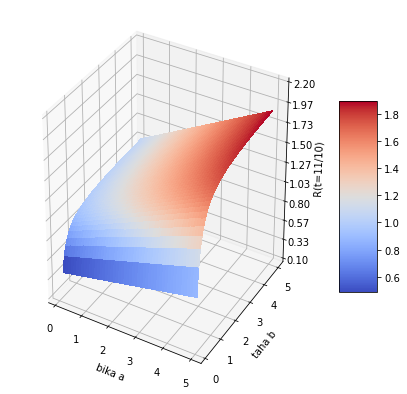

In [ ]:
# Variation of R(datyab) with rapport to the prior parameters

datyab = daty_data_mifar

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')

# Make data.
X = np.linspace(0.1,5,100)
Y = np.linspace(0.1,5,100)
X, Y = np.meshgrid(X, Y)
Z = func_sh(datyab)(X)*func_sc(datyab)(Y)
W = X*Y
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#surf = ax.plot_surface(X, Y, W, cmap=cm.coolwarm,
 #                      linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0.1,2.2)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set(xlabel ='bika a', ylabel = "taha b", zlabel = 'R(t=11/10)')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.savefig(path_to_save+'Rt1110_horo.eps')

plt.show()

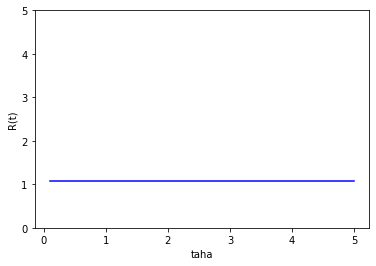

taha* = 1
R(t= 2020-10-11 ) = 1.0718027107346602 = bika*


In [ ]:
# R(t) when equality between the prior and the posterior

# 100 linearly spaced numbers
x = np.linspace(0.1,5,100)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# plot the function
plt.plot(x, x*funcsh_inv(datyab)(x/func_sc(datyab)(x)), 'blue')

ax.set_ylim(0,5)
ax.set(xlabel ='taha', ylabel = "R(t)")


# show the plot
plt.show()

print('taha* = 1')
print('R(t=',datyab,') =', funcsh_inv(datyab)(1/func_sc(datyab)(1)), '= bika*')


# Fanombanana ny R(t) (estimation of Rt)

## Fomba mifidy a sy b

In [ ]:
# Prior Gamma distribution of Rt

Rtpr_sh = 1 # shape
Rtpr_sc = 1.1 # scale

# Posterior distribution for Rt

# Shape parameter :
def Rtps_sh(t):
   return Rtpr_sh + Ireh(t,kk)

# Scale
def Rtps_sc(t):
  return 1/(1/Rtpr_sc + tlsi(t,kk))

# mean
def Rt_salan(t):
  return Rtps_sh(t)*Rtps_sc(t)

# 75th and 25th percentiles

def perc75(t):
  return gengamma.ppf(0.75, Rtps_sh(t), 1, loc = 0, scale = Rtps_sc(t))

def perc25(t):
  return gengamma.ppf(0.25, Rtps_sh(t), 1, loc = 0, scale = Rtps_sc(t))


def Rtps_sal(t):
  return dIvao['Voatomb'].loc[format_date(t)]/lsi(t)


daty_oh1 = datetime.date(2020,7,18)

print("Kajy mivantana ny R hoan'ny", daty_data_mifar, ':', Rtps_sal(daty_data_mifar))

print("Salan'isa R hoan'ny", daty_oh1, ':', Rt_salan(daty_oh1))
print("Kartily @ 75% R hoan'ny", daty_oh1, ':', perc75(daty_oh1))
print("Kartily @ 25% R hoan'ny", daty_oh1, ':', perc25(daty_oh1))


print("Salan'isa R hoan'ny", daty_data_mifar, ':', Rt_salan(daty_data_mifar))
print("Kartily @ 75% R hoan'ny", daty_data_mifar, ':', perc75(daty_data_mifar))
print("Kartily @ 25% R hoan'ny", daty_data_mifar, ':', perc25(daty_data_mifar))

Kajy mivantana ny R hoan'ny 2020-10-11 : 0.7613577689148561
Salan'isa R hoan'ny 2020-07-18 : 1.1
Kartily @ 75% R hoan'ny 2020-07-18 : 1.5249237972318797
Kartily @ 25% R hoan'ny 2020-07-18 : 0.316450279696959
Salan'isa R hoan'ny 2020-10-11 : 1.075742061586517
Kartily @ 75% R hoan'ny 2020-10-11 : 1.315243245328616
Kartily @ 25% R hoan'ny 2020-10-11 : 0.7810896878335858


In [ ]:
rt_horo_lst = []

daty_oh2 = datetime.date(2020,10,11)
for i in range(12):
  t = daty_oh2 - datetime.timedelta(days = i)
  rt_amboar = Rt_salan(t)
  rt_horo_lst.append((t,Rt_salan(t)))

rt_horo_lst

[(datetime.date(2020, 10, 11), 1.075742061586517),
 (datetime.date(2020, 10, 10), 0.9435161494260479),
 (datetime.date(2020, 10, 9), 0.3466059850122471),
 (datetime.date(2020, 10, 8), 0.10021118028622145),
 (datetime.date(2020, 10, 7), 0.2668861665059219),
 (datetime.date(2020, 10, 6), 0.2417409405850669),
 (datetime.date(2020, 10, 5), 0.44758460133618616),
 (datetime.date(2020, 10, 4), 0.6344307587582688),
 (datetime.date(2020, 10, 3), 0.4138068560850501),
 (datetime.date(2020, 10, 2), 0.36396769983622435),
 (datetime.date(2020, 10, 1), 0.3525679127457074),
 (datetime.date(2020, 9, 30), 0.27309258601030645)]

In [ ]:
# Plotting 

np.random.seed(12345)

daty_data_mifar9 = daty_data_mifar - datetime.timedelta(days = 9)

formatf_date = lambda date_py: '{}/{}'.format(date_py.day, date_py.month)

daty_lst = []

data_Rt_lst = []

for i in range(round(((daty_data_mifar - daty_data_mifar9).days)+1)):
  t = daty_data_mifar9 + datetime.timedelta(days = i)
  data_amboar = [gengamma.rvs( func_sh(t)(Rt_salan(t)), 1, loc = 0, scale = func_sc(t)(1)) for j in range(1000)]
  daty_lst.append(formatf_date(t))
  data_Rt_lst.append(data_amboar)

In [ ]:
Rtdata = pd.DataFrame(columns =['daty10','rt10'])
for i in range(10):
    Rtdata.loc[i] = [daty_lst[i],data_Rt_lst[i]]

Rtdata = Rtdata.explode('rt10')
Rtdata['rt10'] = Rtdata['rt10'].astype('float')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


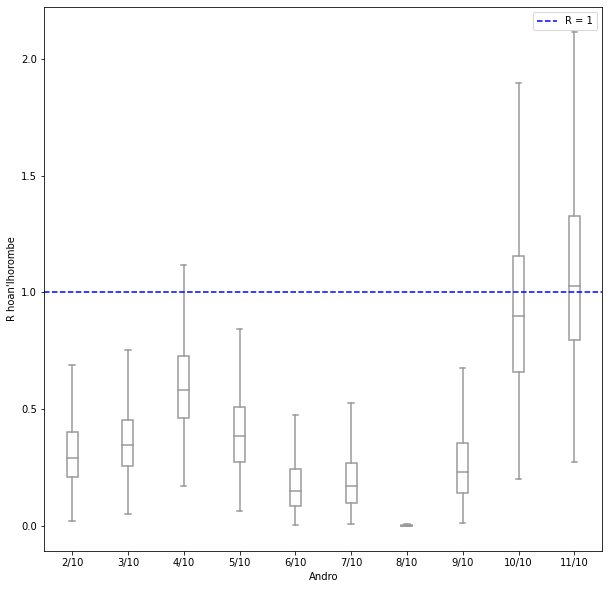

In [ ]:
# Plotting the last 10 days


fig, ax = plt.subplots(figsize=(10, 10))

sns.boxplot(x = "daty10", y = "rt10", data = Rtdata, color='white', width=0.2, showfliers=False, ax=ax)
ax.axhline(y=1, color='b', linestyle='dashed', label ="R = 1")

ax.set(xlabel ='Andro', ylabel = "R hoan'Ihorombe")
ax.legend(loc= 'best')

plt.savefig(path_to_save+'Rt111010_horo.png')
plt.savefig(path_to_save+'Rt111010_horo.eps')
plt.show()

# Jeritodika ny herinandro

In [ ]:
daty_ambaj = datetime.date(2020,10,6)
daty_amboj = datetime.date(2020,10,11)

daty_data_mifarj = datetime.date(2020,10,4)

In [ ]:
daty_oh1 = daty_ambaj

print("Tombana ambany: R ",daty_oh1,':',  Rt_salan(daty_oh1))
print("75%-kartily R :",':', perc75(daty_oh1))
print("25%-kartily R :", perc25(daty_oh1))

daty_oh2 = daty_amboj

print("Tombana ambony: R", daty_oh2,':', Rt_salan(daty_oh2))
print("75%-kartily R :",':', perc75(daty_oh2))
print("25%-kartily R :", perc25(daty_oh2))


Tombana ambany: R  2020-10-06 : 0.2417409405850669
75%-kartily R : : 0.31590722717558595
25%-kartily R : 0.13918632864854683
Tombana ambony: R 2020-10-11 : 1.075742061586517
75%-kartily R : : 1.315243245328616
25%-kartily R : 0.7810896878335858


### Ambany

In [ ]:
# Computing Ivao(daty_mifarj + i) for i in range(1,8)

daty_m1j = daty_data_mifarj + datetime.timedelta(days = 1)

#Rt_amba_hitsiny = (Rt_salan(datetime.date(2020,7,20))- Rt_salan(daty_ambaj))/2

Rt_amba_hitsiny = 0
Rt_vinaj = Rt_salan(daty_ambaj) + Rt_amba_hitsiny

Iv = int(Rt_vinaj*lsi(daty_m1j))

dIvao.loc[pd.to_datetime(daty_m1j)] =[Iv]

for i in range(1,8):
 tj = daty_m1j + datetime.timedelta(days = i)
 Ivv = int(Rt_vinaj*lsi(tj))
 dIvao.loc[pd.to_datetime(tj)] = [Ivv]

In [ ]:
Rt_vinaj

0.73591609814785

In [ ]:
# Sampling

np.random.seed(12345)

formatf_date = lambda date_py: '{}/{}'.format(date_py.day, date_py.month)

daty_j_lst = []

data_baj = []


for i in range(1,8):
  t = daty_data_mifarj + datetime.timedelta(days = i)
  daty = formatf_date(t)
  datyy = format_date(t)
  data_amboar = [ poisson.rvs(dIvao.loc[datyy]) for j in range(600)]
  daty_j_lst.append(daty)
  data_baj.append(data_amboar)


###Ambony

In [ ]:
# Computing Ivao(daty_mifarj + i) for i in range(1,8)

daty_m1j = daty_data_mifarj + datetime.timedelta(days = 1)

#Rt_ambo_hitsiny = (Rt_salan(datetime.date(2020,7,22))- Rt_salan(daty_amboj))/2

Rt_ambo_hitsiny = 0
Rt_vinaj = Rt_salan(daty_amboj) + Rt_ambo_hitsiny

Iv = int(Rt_vinaj*lsi(daty_m1j))

dIvao.loc[pd.to_datetime(daty_m1j)] =[Iv]

for i in range(1,8):
 tj = daty_m1j + datetime.timedelta(days = i)
 Ivv = int(Rt_vinaj*lsi(tj))
 dIvao.loc[pd.to_datetime(tj)] = [Ivv]

In [ ]:
Rt_vinaj

1.8928622314255608

In [ ]:
# Sampling 

np.random.seed(12345)

formatf_date = lambda date_py: '{}/{}'.format(date_py.day, date_py.month)

daty_j_lst = []

data_boj = []


for i in range(1,8):
  t = daty_data_mifarj + datetime.timedelta(days = i)
  daty = formatf_date(t)
  datyy = format_date(t)
  data_amboar = [ poisson.rvs(dIvao.loc[datyy]) for j in range(600)]
  daty_j_lst.append(daty)
  data_boj.append(data_amboar)


In [ ]:
Rtdataj = pd.DataFrame(columns =['datyj','rtbaj','rtboj'])
for i in range(7):
    Rtdataj.loc[i] = [daty_j_lst[i],data_baj[i], data_boj[i]]

Rtdataj = Rtdataj.explode('rtbaj')
Rtdataj = Rtdataj.explode('rtboj')
Rtdataj['rtbaj'] = Rtdataj['rtbaj'].astype('float')
Rtdataj['rtboj'] = Rtdataj['rtboj'].astype('float')

### Sary

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


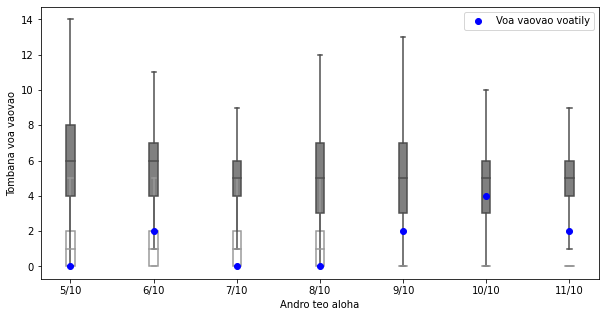

In [ ]:
# Plotting the evaluation of the last 7 days

fig, ax = plt.subplots(figsize=(10,5))
box = sns.boxplot(x = "datyj", y = 'rtbaj', data = Rtdataj, color='white', width=0.1, showfliers=False, ax=ax)
box = sns.boxplot(x = "datyj", y = 'rtboj', data = Rtdataj, color='grey', width=0.1, showfliers=False, ax=ax)
ax.plot(daty_j_lst, dIvao.loc[pd.to_datetime(daty_m1j):pd.to_datetime(daty_m1j + datetime.timedelta(days = 6))], marker ="o",ls = 'None', color='blue',label="Voa vaovao voatily")
ax.set(xlabel = 'Andro teo aloha', ylabel="Tombana voa vaovao")

plt.legend(loc= 'best')

plt.savefig(path_to_save+'Iv510j_horo.eps')
plt.savefig(path_to_save+'Iv510j_horo.png')

plt.show()

# Ny 7 andro manaraka

In [ ]:
# Choice of R(t) for the forecasting

# Dates for which R(t) is minimum and maximum during the last 10 days

daty_amba = datetime.date(2020,10,6)
daty_ambo = datetime.date(2020,10,11)

### Vinavina ambany

In [ ]:
# Computing Ivao(daty_mifar + i) for i in range(1,8)

daty_m1 = daty_data_mifar + datetime.timedelta(days = 1)

Iv = int(Rt_salan(daty_amba)*lsi(daty_m1))

dIvao.loc[pd.to_datetime(daty_m1)] =[Iv]

for i in range(1,8):
 errt = daty_m1 + datetime.timedelta(days = i)
 Ivv = int(Rt_salan(daty_amba)*lsi(errt))
 dIvao.loc[pd.to_datetime(errt)] =[Ivv]


In [ ]:
# Sampling

np.random.seed(12345)

formatf_date = lambda date_py: '{}/{}'.format(date_py.day, date_py.month)

daty_hoav_lst = []

data_amba_hoav = []

Ivv_dat = []

for i in range(1,8):
  t = daty_data_mifar + datetime.timedelta(days = i)
  daty = formatf_date(t)
  datyy = format_date(t)
  data_amboar = [ poisson.rvs(dIvao.loc[datyy]) for j in range(600)]
  daty_hoav_lst.append(daty)
  data_amba_hoav.append(data_amboar)

In [ ]:
print('Vinavina ambany')

daty_oh = datetime.date(2020,10,14)

print("Notombanana avy amin'ny R(", daty_amba, ')', Rt_salan(daty_amba)) 
print("Vinavina R hoan'ny", daty_oh, ':', Rt_salan(daty_oh))
print("Vinavina kartily @ 75% R hoan'ny",daty_oh, ':', perc75(daty_oh))
print("Vinavina kartily @ 25% R hoan'ny", daty_oh, ':', perc25(daty_oh))
print("Vinavina isan'ny voa vaovao hoan'ny", daty_oh, ':', dIvao['Voatomb'].loc[format_date(daty_oh)])

print("Vinavina kartily @ 75% R hoan'ny", daty_oh, ':', poisson.ppf(0.95, dIvao.loc[format_date(daty_oh)]))
print("Vinavina kartily @ 25% R hoan'ny", daty_oh, ':', poisson.ppf(0.25, dIvao.loc[format_date(daty_oh)]))

Vinavina ambany
Notombanana avy amin'ny R( 2020-10-06 ) 0.2417409405850669
Vinavina R hoan'ny 2020-10-14 : 0.1935417518192383
Vinavina kartily @ 75% R hoan'ny 2020-10-14 : 0.2683058391882754
Vinavina kartily @ 25% R hoan'ny 2020-10-14 : 0.05567849226930671
Vinavina isan'ny voa vaovao hoan'ny 2020-10-14 : 0.0
Vinavina kartily @ 75% R hoan'ny 2020-10-14 : [0.]
Vinavina kartily @ 25% R hoan'ny 2020-10-14 : [0.]


### Vinavina ambony

In [ ]:
# Computing Ivao(daty_mifar + i) for i in range(1,8)

daty_m1 = daty_data_mifar + datetime.timedelta(days = 1)

Iv = int(Rt_salan(daty_ambo)*lsi(daty_m1))

dIvao.loc[pd.to_datetime(daty_m1)] =[Iv]

for i in range(1,8):
 errt = daty_m1 + datetime.timedelta(days = i)
 Ivv = int(Rt_salan(daty_ambo)*lsi(errt))
 dIvao.loc[pd.to_datetime(errt)] =[Ivv]


In [ ]:
# Sampling

np.random.seed(12345)

formatf_date = lambda date_py: '{}/{}'.format(date_py.day, date_py.month)

daty_hoav_lst = []

data_ambo_hoav = []

Ivv_dat = []

for i in range(1,8):
  t = daty_data_mifar + datetime.timedelta(days = i)
  daty = formatf_date(t)
  datyy = format_date(t)
  data_amboar = [ poisson.rvs(dIvao.loc[datyy]) for j in range(600)]
  daty_hoav_lst.append(daty)
  data_ambo_hoav.append(data_amboar)

In [ ]:
print('Vinavina ambony')

daty_oh = datetime.date(2020,10,14)

print("Notombanana avy amin'ny R(", daty_ambo, ')', Rt_salan(daty_ambo)) 
print("Vinavina R hoan'ny", daty_oh, ':', Rt_salan(daty_oh))
print("Vinavina kartily @ 75% R hoan'ny",daty_oh, ':', perc75(daty_oh))
print("Vinavina kartily @ 25% R hoan'ny", daty_oh, ':', perc25(daty_oh))
print("Vinavina isan'ny voa vaovao hoan'ny", daty_oh, ':', dIvao['Voatomb'].loc[format_date(daty_oh)])

print("Vinavina kartily @ 75% R hoan'ny", daty_oh, ':', poisson.ppf(0.95, dIvao.loc[format_date(daty_oh)]))
print("Vinavina kartily @ 25% R hoan'ny", daty_oh, ':', poisson.ppf(0.25, dIvao.loc[format_date(daty_oh)]))

Vinavina ambony
Notombanana avy amin'ny R( 2020-10-11 ) 1.075742061586517
Vinavina R hoan'ny 2020-10-14 : 0.9124934969902501
Vinavina kartily @ 75% R hoan'ny 2020-10-14 : 1.1450754419293543
Vinavina kartily @ 25% R hoan'ny 2020-10-14 : 0.6147651892326303
Vinavina isan'ny voa vaovao hoan'ny 2020-10-14 : 2.0
Vinavina kartily @ 75% R hoan'ny 2020-10-14 : [5.]
Vinavina kartily @ 25% R hoan'ny 2020-10-14 : [1.]


In [ ]:
Rtdatah = pd.DataFrame(columns =['datyh','rtbah','rtboh'])
for i in range(7):
    Rtdatah.loc[i] = [daty_hoav_lst[i],data_amba_hoav[i], data_ambo_hoav[i]]

Rtdatah = Rtdatah.explode('rtbah')
Rtdatah = Rtdatah.explode('rtboh')
Rtdatah['rtbah'] = Rtdatah['rtbah'].astype('float')
Rtdatah['rtboh'] = Rtdatah['rtboh'].astype('float')

### Sary

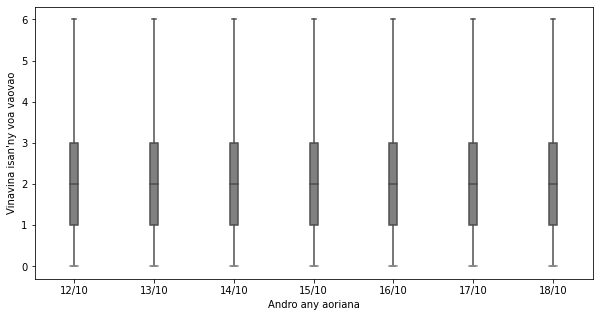

In [ ]:
# Plotting boundaries for the next 7 days

fig, ax = plt.subplots(figsize=(10,5))
box = sns.boxplot(x = 'datyh', y = 'rtbah', data = Rtdatah, color='white', width=0.1, showfliers=False, ax=ax)
box = sns.boxplot(x = 'datyh', y = 'rtboh', data = Rtdatah, color='grey', width=0.1, showfliers=False, ax=ax)

ax.set_xlabel('Andro any aoriana')
ax.set_ylabel("Vinavina isan'ny voa vaovao")

plt.savefig(path_to_save+'Iv1110hoav_horo.eps')
plt.savefig(path_to_save+'Iv1110hoav_horo.png')

plt.show()

## Vinavina lavitra 

In [ ]:
# Choice of R(t) for the forecasting

# Dates for which R(t) is minimum and maximum during the last 10 days

daty_amba = datetime.date(2020,7,25)
daty_ambo = datetime.date(2020,7,23)


### Lavitra ambany

In [ ]:
# Computing Ivao(daty_mifar + i) for i in range(1,8)

daty_m1 = daty_data_mifar + datetime.timedelta(days = 1)

Iv = int(Rt_salan(daty_amba)*lsi(daty_m1))

dIvao.loc[pd.to_datetime(daty_m1)] =[Iv]

for i in range(1,200):
 errt = daty_m1 + datetime.timedelta(days = i)
 Ivv = int(Rt_salan(daty_amba)*lsi(errt))
 dIvao.loc[pd.to_datetime(errt)] =[Ivv]


In [ ]:
# Sampling

np.random.seed(12345)

formatf_date = lambda date_py: '{}/{}'.format(date_py.day, str(date_py.month))

daty_hoav_lst = []

data_amba_hoav = []

Ivv_dat = []

for i in range(1,200):
  t = daty_data_mifar + datetime.timedelta(days = i)
  daty = formatf_date(t)
  datyy = format_date(t)
  data_amboar = [ poisson.rvs(dIvao.loc[datyy]) for j in range(600)]
  daty_hoav_lst.append(daty)
  data_amba_hoav.append(data_amboar)

In [ ]:
print('Vinavina hafa ambany')

daty_oh = datetime.date(2020,8,4) 

Ireh_mifar = 7422

print("Notombanana avy amin'ny R(", daty_amba, ')', Rt_salan(daty_amba)) 
print("Vinavina R hoan'ny", daty_oh, ':', Rt_salan(daty_oh))
print("Vinavina kartily @ 75% R hoan'ny",daty_oh, ':', perc75(daty_oh))
print("Vinavina kartily @ 25% R hoan'ny", daty_oh, ':', perc25(daty_oh))
print("Vinavina isan'ny voa vaovao hoan'ny", daty_oh, ':', dIvao['Voatomb'].loc[format_date(daty_oh)])

print("Vinavina kartily @ 75% R hoan'ny", daty_oh, ':', poisson.ppf(0.95, dIvao.loc[format_date(daty_oh)]))
print("Vinavina kartily @ 25% R hoan'ny", daty_oh, ':', poisson.ppf(0.25, dIvao.loc[format_date(daty_oh)]))

print("Isan'ny voa rehetra hatr@", daty_oh, ':', Ireh_mifar + Ireh(daty_oh,(daty_oh - daty_data_mifar).days))

### Lavitra ambony

In [ ]:
# Computing Ivao(daty_mifar + i) for i in range(1,8)

daty_m1 = daty_data_mifar + datetime.timedelta(days = 1)

Iv = int(Rt_salan(daty_ambo)*lsi(daty_m1))

dIvao.loc[pd.to_datetime(daty_m1)] =[Iv]

for i in range(1,200):
 errt = daty_m1 + datetime.timedelta(days = i)
 Ivv = int(Rt_salan(daty_ambo)*lsi(errt))
 dIvao.loc[pd.to_datetime(errt)] =[Ivv]


In [ ]:
# Sampling

np.random.seed(12345)

formatf_date = lambda date_py: '{}/{}'.format(date_py.day, str(date_py.month))

daty_hoav_lst = []

data_ambo_hoav = []

Ivv_dat = []

for i in range(1,200):
  t = daty_data_mifar + datetime.timedelta(days = i)
  daty = formatf_date(t)
  datyy = format_date(t)
  data_amboar = [ poisson.rvs(dIvao.loc[datyy]) for j in range(600)]
  daty_hoav_lst.append(daty)
  data_ambo_hoav.append(data_amboar)

In [ ]:
print('Vinavina ambony')

daty_oh = datetime.date(2020,12,22)

print("Notombanana avy amin'ny R(", daty_ambo, ')', Rt_salan(daty_ambo)) 
print("Vinavina R hoan'ny", daty_oh, ':', Rt_salan(daty_oh))
print("Vinavina kartily @ 75% R hoan'ny",daty_oh, ':', perc75(daty_oh))
print("Vinavina kartily @ 25% R hoan'ny", daty_oh, ':', perc25(daty_oh))
print("Vinavina isan'ny voa vaovao hoan'ny", daty_oh, ':', dIvao['Voatomb'].loc[format_date(daty_oh)])

print("Vinavina kartily @ 75% R hoan'ny", daty_oh, ':', poisson.ppf(0.95, dIvao.loc[format_date(daty_oh)]))
print("Vinavina kartily @ 25% R hoan'ny", daty_oh, ':', poisson.ppf(0.25, dIvao.loc[format_date(daty_oh)]))

print("Isan'ny voa rehetra hatr@", daty_oh, ':', Ireh_mifar + Ireh(daty_oh,(daty_oh - daty_data_mifar).days))

## Sary

In [ ]:
# Plotting boundaries for the next 7 days

fig, ax = plt.subplots(figsize=(30,15))
box = sns.boxplot(daty_hoav_lst, data_amba_hoav, color='white', width=0.1, showfliers=False, ax=ax)
box = sns.boxplot(daty_hoav_lst, data_ambo_hoav, color='grey', width=0.1, showfliers=False, ax=ax)

ax.set_xlabel('Andro any aoriana')
ax.set_ylabel("Vinavina isan'ny voa vaovao")

plt.savefig(path_to_save+'Iv167ahoav_ant.eps')
plt.savefig(path_to_save+'Iv167ahoav_ant.png')

plt.show()

In [ ]:
# Plotting boundaries for the next 7 days

fig, ax = plt.subplots(figsize=(10,5))
box = sns.boxplot(daty_hoav_lst[70:80], data_amba_hoav[70:80], color='white', width=0.1, showfliers=False, ax=ax)
box = sns.boxplot(daty_hoav_lst[70:80], data_ambo_hoav[70:80], color='grey', width=0.1, showfliers=False, ax=ax)

ax.set_xlabel('Andro any aoriana')
ax.set_ylabel("Vinavina isan'ny voa vaovao")

plt.savefig(path_to_save+'Iv1677080hoav_ant.eps')
plt.savefig(path_to_save+'Iv1677080hoav_ant.png')

plt.show()